In [2]:
import sys
sys.path.append("/home/149/ab8992/tasman-tides/")
import xarray as xr
import ttidelib as tt
import scipy
import cmocean
import os
from pathlib import Path
cmap = cmocean.cm.dense_r
import matplotlib
import matplotlib.pyplot as plt
earth_cmap = matplotlib.colormaps["gist_earth"]
from datetime import timedelta
import warnings
warnings.simplefilter("ignore")
# import filtering
import numpy as np
import dask
dask.config.set({'logging.distributed': 'error'})
from dask.distributed import Client,default_client
import xrft
import matplotlib.gridspec as gridspec

client = tt.startdask(nthreads=1,n_workers = 52)

client

<Client: 'tcp://127.0.0.1:41479' processes=52 threads=52, memory=416.00 GiB>


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/8787/status,
Dashboard: /proxy/8787/status,Workers: 52
Total threads: 52,Total memory: 416.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:41479,Workers: 52
Dashboard: /proxy/8787/status,Total threads: 52
Started: Just now,Total memory: 416.00 GiB
Comm: tcp://127.0.0.1:46193,Total threads: 1
Dashboard: /proxy/32881/status,Memory: 8.00 GiB
Nanny: tcp://127.0.0.1:44247,


# Show Realistic - NoRidge anomaly for modes 2+ at each resolution, followed by stacked bar plot below


In [ ]:

data = {}
for expt in ["full-10","beamless-10","beamless-20","full-20","full-40","beamless-40","full-80","beamless-80","smooth-10","smooth-20","smooth-40"]:
    path = Path(f"/g/data/nm03/ab8992/postprocessed/figdata/energies/") / expt
    bathy = xr.open_dataset(f"/g/data/nm03/ab8992/outputs/{expt}/bathy_transect.nc")
    times = os.listdir(path)
    times = np.sort(np.array([int(i.split("t0-")[1]) for i in times]))

    data[expt] = None
    for i in range(len(times)):
        try:
            if "80" in expt:
                newdata = xr.merge(
                            [
                                xr.open_dataset(path / f"t0-{times[i]}" / "KE.nc",decode_times= False,decode_cf = False).KE.rename("KE"),
                                xr.open_dataset(path / f"t0-{times[i]}" / "EF_alongbeam.nc",decode_times= False,decode_cf = False).EF.rename("EF_alongbeam").mean("time"),
                                xr.open_dataset(path / f"t0-{times[i]}" / "EF_acrossbeam.nc",decode_times= False,decode_cf = False).EF.rename("EF_acrossbeam").mean("time"),
                                xr.open_dataset(path / f"t0-{times[i]}" / "EF_alongbeam_forward.nc",decode_times= False,decode_cf = False).EF_alongbeam_forward,
                                xr.open_dataset(path / f"t0-{times[i]}" / "EF_acrossbeam_forward.nc",decode_times= False,decode_cf = False).EF_acrossbeam_forward,
                                xr.open_dataset(path / f"t0-{times[i]}" / "EF_alongbeam_backward.nc",decode_times= False,decode_cf = False).EF_alongbeam_backward,
                                xr.open_dataset(path / f"t0-{times[i]}" / "EF_acrossbeam_backward.nc",decode_times= False,decode_cf = False).EF_acrossbeam_backward,
                                bathy.rename({"depth":"bathy"}) * -1
                            ]
                        ).expand_dims({"time":[float(times[i])]})
            else:
                newdata = xr.merge(
                            [
                                (
                                    xr.open_dataset(path / f"t0-{times[i]}" / "KE_forward.nc",decode_times= False,decode_cf = False).KE_forward +
                                    xr.open_dataset(path / f"t0-{times[i]}" / "KE_backward.nc",decode_times= False,decode_cf = False).KE_backward +
                                    xr.open_dataset(path / f"t0-{times[i]}" / "KE_cross.nc",decode_times= False,decode_cf = False).KE_cross
                                    ).rename("KE"),
                                xr.open_dataset(path / f"t0-{times[i]}" / "EF_alongbeam.nc",decode_times= False,decode_cf = False).EF.rename("EF_alongbeam").mean("time"),
                                xr.open_dataset(path / f"t0-{times[i]}" / "EF_acrossbeam.nc",decode_times= False,decode_cf = False).EF.rename("EF_acrossbeam").mean("time"),
                                xr.open_dataset(path / f"t0-{times[i]}" / "EF_alongbeam_forward.nc",decode_times= False,decode_cf = False).EF_alongbeam_forward,
                                xr.open_dataset(path / f"t0-{times[i]}" / "EF_acrossbeam_forward.nc",decode_times= False,decode_cf = False).EF_acrossbeam_forward,
                                xr.open_dataset(path / f"t0-{times[i]}" / "EF_alongbeam_backward.nc",decode_times= False,decode_cf = False).EF_alongbeam_backward,
                                xr.open_dataset(path / f"t0-{times[i]}" / "EF_acrossbeam_backward.nc",decode_times= False,decode_cf = False).EF_acrossbeam_backward,
                                bathy.rename({"depth":"bathy"}) * -1
                            ]
                        ).expand_dims({"time":[float(times[i])]})
            if data[expt] is None:
                data[expt] = newdata
            else:
                data[expt] = xr.concat(
                    [
                        data[expt],
                        newdata
                    ],
                    dim = "time"
                )
        except Exception as e:
            print(f"Error processing time {times[i]} for experiment {expt}: {e}")

    data[expt] = data[expt].mean("time")

## POINT IN KLYMAK CORRESPONDS TO:
xb,yb = 224,68

Error processing time 3960 for experiment full-40: [Errno 2] No such file or directory: '/g/data/nm03/ab8992/postprocessed/figdata/energies/full-40/t0-3960/KE_forward.nc'
Error processing time 4680 for experiment full-40: [Errno 2] No such file or directory: '/g/data/nm03/ab8992/postprocessed/figdata/energies/full-40/t0-4680/KE_forward.nc'
Error processing time 5400 for experiment full-40: [Errno 2] No such file or directory: '/g/data/nm03/ab8992/postprocessed/figdata/energies/full-40/t0-5400/KE_forward.nc'
Error processing time 6120 for experiment full-40: [Errno 2] No such file or directory: '/g/data/nm03/ab8992/postprocessed/figdata/energies/full-40/t0-6120/KE_forward.nc'
Error processing time 7560 for experiment full-40: [Errno 2] No such file or directory: '/g/data/nm03/ab8992/postprocessed/figdata/energies/full-40/t0-7560/KE_forward.nc'
Error processing time 8280 for experiment full-40: [Errno 2] No such file or directory: '/g/data/nm03/ab8992/postprocessed/figdata/energies/full-

In [ ]:
for expt in data:
    data[expt].to_netcdf(f"/g/data/nm03/ab8992/postprocessed/figdata/averaged/{expt}",mode="w")

## Second draft: line plot of anomaly below rather than bar plots


0.032488551687927816
0.315449962127334
0.5199008662727812


Text(0.55, 0.5, '500Jm$^{-2}$')

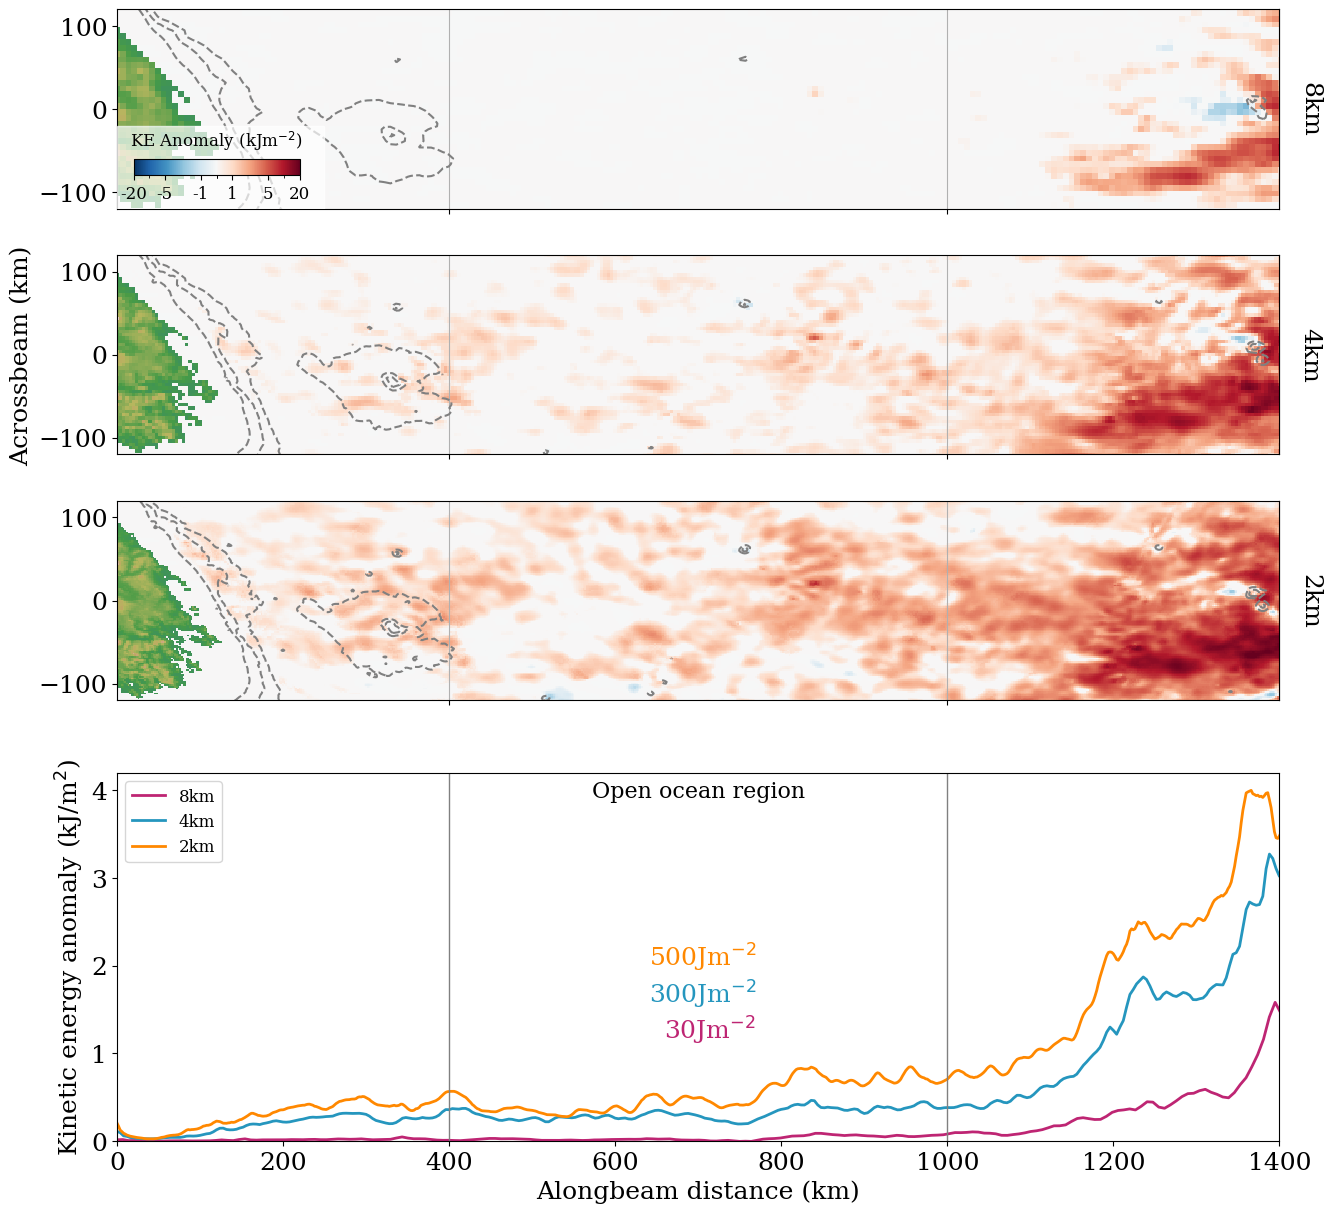

In [69]:
### Add map plots of higher mode anomalies 
fig = plt.figure(figsize = (15,15))
font = {'family' : 'serif',
        'weight':'normal',
        'size'   : 18}
matplotlib.rc('font', **font)

lineplot_colours = ['#be2573','#2596be','#ff8800',"#00bf7c"]

gs = gridspec.GridSpec(5, 1, height_ratios=[1,  1,1, 0.2, 1.5], hspace=0.001, wspace=0.5)
ax = [fig.add_subplot(gs[i]) for i in range(3)]
ax_lineplot = fig.add_subplot(gs[4])

ax = np.array(ax).reshape(3)
scale = 20

import matplotlib.colors as colors
norm = colors.SymLogNorm(linthresh=0.5, linscale=0.002,vmin = -scale,vmax = scale,)


for i , res in enumerate([10,20,40]):
    #TODO Make a log colourbar here to apply to all axes
    m2data = (
        data[f"full-{res}"].KE - (data[f"beamless-{res}"].KE) 
    ).isel(mode = slice(1,None)).sum("mode")
    m2data.plot(ax = ax[i],cmap = "RdBu_r",add_colorbar = False,norm = norm)
    tt.plot_topo(ax[i], data[f"full-{res}"].bathy)  
    (data[f"full-{res}"].bathy).plot.contour(levels=[-1000,-2000,-3000],ax = ax[i],colors = ["grey","grey","grey"],linestyles = "dashed",lineweights = 2)

    # Line plot
    m2data.mean("yb").plot(ax = ax_lineplot,color = lineplot_colours[i],linewidth = 2)
    print(m2data.mean("yb").sel(xb = slice(400,1000)).mean("xb").values)



for i,a in enumerate(ax.flatten()):
    a.set_aspect("equal")
    a.set_title("")
    a.set_xlabel("")
    a.set_ylabel("")
    a.set_ylabel("")
    a.set_xticks([])
    a.set_xticks([400,1000])
    a.set_xticklabels([])
    a.grid(axis = "x")
    a.set_ylim(-120,120)
    a.set_xlim(0,1400)
    b = a.secondary_yaxis('right')
    b.set_ylabel('')
    b.set_yticks([])

    if i == 0:
        b.set_ylabel("8km",rotation = 270,labelpad = 30)
    elif i == 1:
        b.set_ylabel("4km",rotation = 270,labelpad = 30)
    elif i == 2:
        b.set_ylabel("2km",rotation = 270,labelpad = 30)
    elif i == 3:
        b.set_ylabel("1km",rotation = 270,labelpad = 30)
    a.set_ylim(-120,120)
    a.set_xlim(0,1400)
    # a.set_yticks([])
ax[1].set_ylabel("Acrossbeam (km)")



patch = ax[0].add_patch(matplotlib.patches.Rectangle((0, -120), 250, 100, color='white', alpha=0.7))
cax1 = ax[0].inset_axes([20, -80, 200, 20],transform=ax[0].transData)  # Adjust size and location
patch.set_zorder(9)
cax1.set_zorder(10)  # Bring the patch to the front
cbar = plt.colorbar(
    plt.cm.ScalarMappable(cmap="RdBu_r", norm=norm),
    cax=cax1,
    orientation='horizontal',
    location="bottom",
    label=r"KE Anomaly (kJm$^{-2}$)",
)
cbar.ax.xaxis.set_label_coords(0.5, 2.8)  # Adjust the title position to be higher
xticks = [-scale,-5,-1,1,5,scale ]
xticklabels = [str(i) for i in xticks]
cbar.set_ticks(xticks)
cbar.set_ticklabels(xticklabels)
cax1.tick_params(labelsize=12, color="black", labelcolor="black")  # Set font size and color for colorbar ticks
cax1.xaxis.label.set_size(12)  # Set font size for colorbar label
cax1.xaxis.label.set_color("black")  # Set label color to black


ax_lineplot.set_xlabel("Alongbeam distance (km)")
ax_lineplot.set_ylabel("Kinetic energy anomaly (kJ/m$^2$)")
ax_lineplot.set_xlim(0,1400)
# ax_lineplot.set_xticks([400,1000])

ax_lineplot.set_ylim(0,4.2)
ax_lineplot.set_title("")
# ax_lineplot.grid(axis = "x")
ax_lineplot.vlines(400,0,4.2,color = "grey",linestyle = "solid",linewidth = 1)
ax_lineplot.vlines(1000,0,4.2,color = "grey",linestyle = "solid",linewidth = 1)
## Plot line plots of each resolution
# for i, res in enumerate([10,20,40,80]):

# Add a custom legend to plot 1
custom_legend = [
    matplotlib.lines.Line2D([0], [0], color=lineplot_colours[0], lw=2, label='8km'),
    matplotlib.lines.Line2D([0], [0], color=lineplot_colours[1], lw=2, label='4km'),
    matplotlib.lines.Line2D([0], [0], color=lineplot_colours[2], lw=2, label='2km'),
    # matplotlib.lines.Line2D([0], [0], color=lineplot_colours[3], lw=2, label='1')
]
ax_lineplot.text(0.5, 0.95, "Open ocean region", ha='center', va='center', transform=ax_lineplot.transAxes, fontsize=16)
# ax_lineplot.text(0.85, 0.95, "Generation region", ha='center', va='center', transform=ax_lineplot.transAxes, fontsize=16)
# ax_lineplot.text(0.2, 0.95, "Shelf region", ha='center', va='center', transform=ax_lineplot.transAxes, fontsize=16)
ax_lineplot.legend(handles=custom_legend, loc='upper left', fontsize=12)


ax_lineplot.text(0.55, 0.3, r"30Jm$^{-2}$", ha='right', va='center', transform=ax_lineplot.transAxes, color = lineplot_colours[0],fontdict = font)
ax_lineplot.text(0.55, 0.4, r"300Jm$^{-2}$", ha='right', va='center', transform=ax_lineplot.transAxes, color = lineplot_colours[1],fontdict = font)
ax_lineplot.text(0.55, 0.5, r"500Jm$^{-2}$", ha='right', va='center', transform=ax_lineplot.transAxes, color = lineplot_colours[2],fontdict = font)


## Third take: try |EF| rather than KE

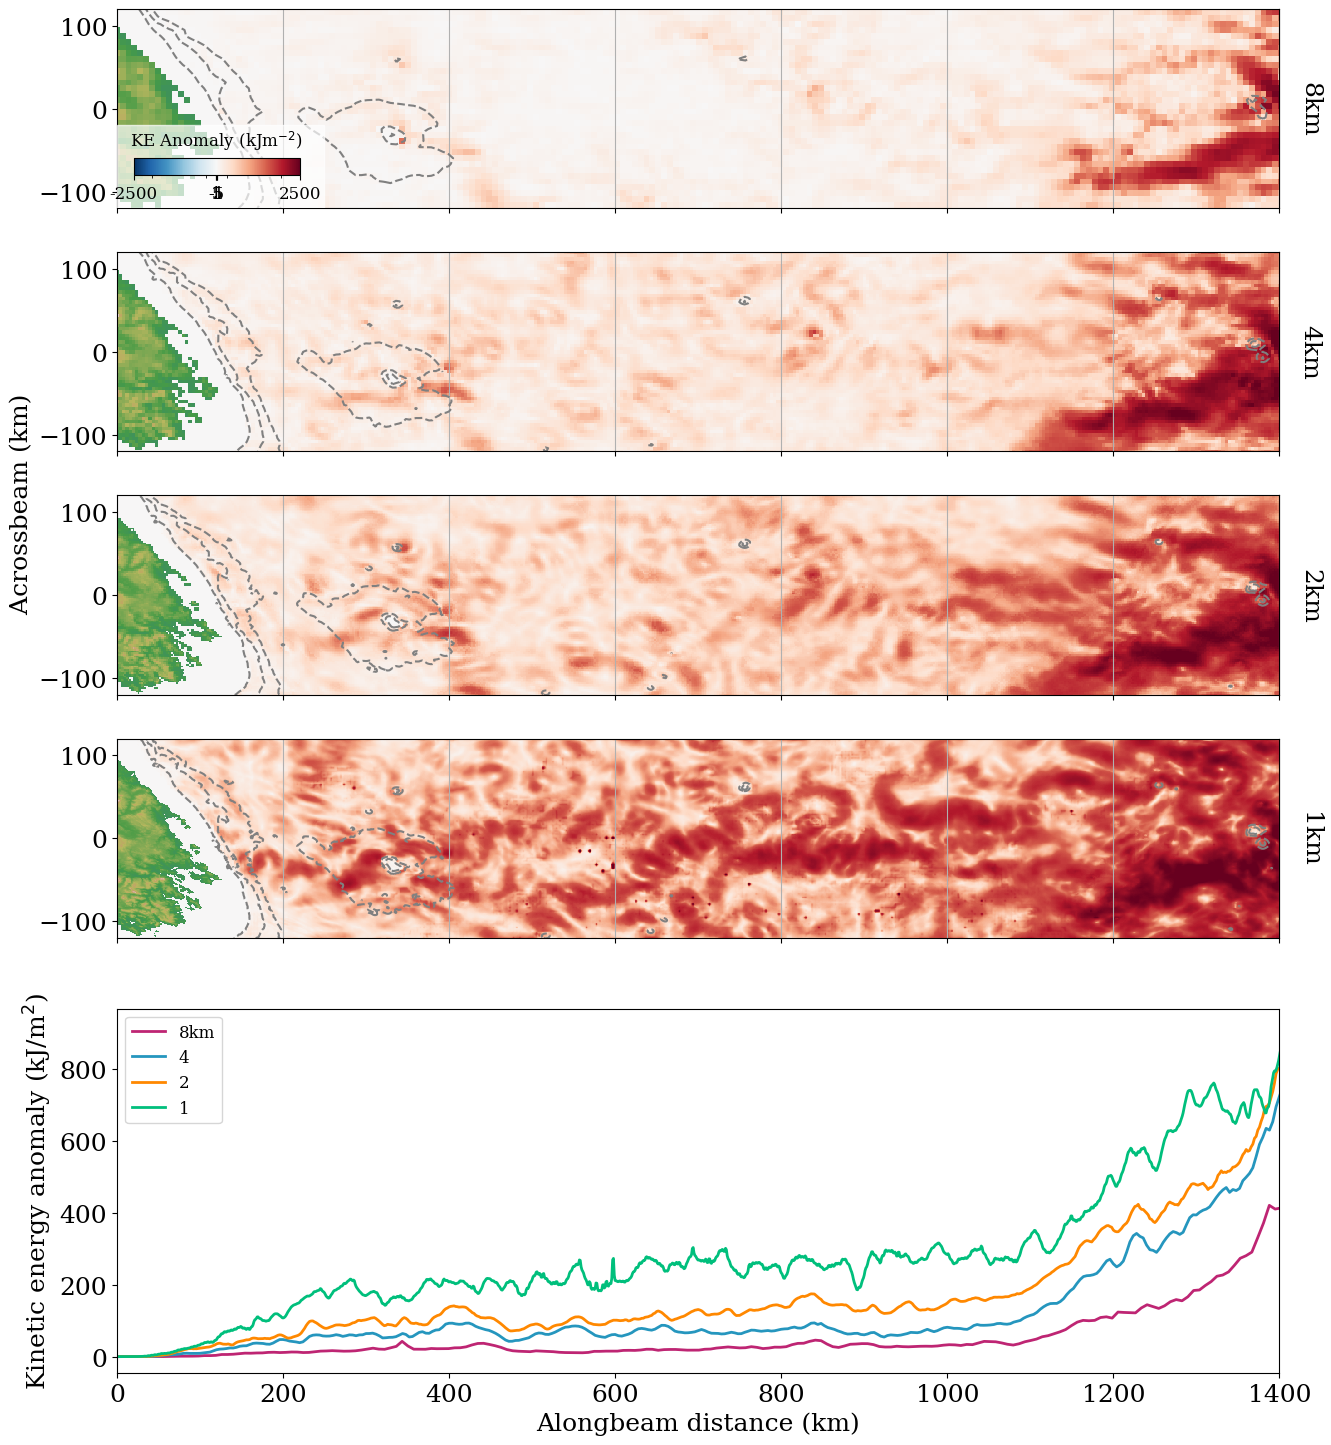

In [71]:
### Add map plots of higher mode anomalies 
fig = plt.figure(figsize = (15,18))
font = {'family' : 'serif',
        'weight':'normal',
        'size'   : 18}
matplotlib.rc('font', **font)

lineplot_colours = ['#be2573','#2596be','#ff8800',"#00bf7c"]

gs = gridspec.GridSpec(6, 1, height_ratios=[1, 1, 1,1, 0.2, 1.5], hspace=0.001, wspace=0.5)
ax = [fig.add_subplot(gs[i]) for i in range(4)]
ax_lineplot = fig.add_subplot(gs[5])

ax = np.array(ax).reshape(4)
scale = 2500

import matplotlib.colors as colors
norm = colors.SymLogNorm(linthresh=500, linscale=1,vmin = -scale,vmax = scale,)


for i , res in enumerate([10,20,40,80]):
    m2data = (
        np.sqrt(data[f"full-{res}"].EF_alongbeam**2 + data[f"full-{res}"].EF_acrossbeam**2)  - 
        0 * np.sqrt(data[f"beamless-{res}"].EF_alongbeam**2 + data[f"beamless-{res}"].EF_acrossbeam**2) 
    ).isel(mode = slice(1,None)).sum("mode")
    m2data.plot(ax = ax[i],cmap = "RdBu_r",add_colorbar = False,norm = norm)
    # m2data.plot(ax = ax[i],cmap = "RdBu_r",add_colorbar = True) #! Temporary to check colourbar values
    tt.plot_topo(ax[i], data[f"full-{res}"].bathy)  
    (data[f"full-{res}"].bathy).plot.contour(levels=[-1000,-2000,-3000],ax = ax[i],colors = ["grey","grey","grey"],linestyles = "dashed",lineweights = 2)

    # Line plot
    m2data.mean("yb").plot(ax = ax_lineplot,color = lineplot_colours[i],linewidth = 2)



for i,a in enumerate(ax.flatten()):
    a.set_aspect("equal")
    a.set_title("")
    a.set_xlabel("")
    a.set_ylabel("")
    a.set_ylabel("")
    a.set_xticks([])
    a.set_xticks([0,200,400,600,800,1000,1200,1400])
    a.set_xticklabels([])
    a.grid(axis = "x")
    a.set_ylim(-120,120)
    a.set_xlim(0,1400)
    b = a.secondary_yaxis('right')
    b.set_ylabel('')
    b.set_yticks([])

    if i == 0:
        b.set_ylabel("8km",rotation = 270,labelpad = 30)
    elif i == 1:
        b.set_ylabel("4km",rotation = 270,labelpad = 30)
    elif i == 2:
        b.set_ylabel("2km",rotation = 270,labelpad = 30)
    elif i == 3:
        b.set_ylabel("1km",rotation = 270,labelpad = 30)
    a.set_ylim(-120,120)
    a.set_xlim(0,1400)
    # a.set_yticks([])
ax[2].set_ylabel("                       Acrossbeam (km)")



patch = ax[0].add_patch(matplotlib.patches.Rectangle((0, -120), 250, 100, color='white', alpha=0.7))
cax1 = ax[0].inset_axes([20, -80, 200, 20],transform=ax[0].transData)  # Adjust size and location
patch.set_zorder(9)
cax1.set_zorder(10)  # Bring the patch to the front
cbar = plt.colorbar(
    plt.cm.ScalarMappable(cmap="RdBu_r", norm=norm),
    cax=cax1,
    orientation='horizontal',
    location="bottom",
    label=r"KE Anomaly (kJm$^{-2}$)",
)
cbar.ax.xaxis.set_label_coords(0.5, 2.8)  # Adjust the title position to be higher
xticks = [-scale,-5,-1,1,5,scale ]
xticklabels = [str(i) for i in xticks]
cbar.set_ticks(xticks)
cbar.set_ticklabels(xticklabels)
cax1.tick_params(labelsize=12, color="black", labelcolor="black")  # Set font size and color for colorbar ticks
cax1.xaxis.label.set_size(12)  # Set font size for colorbar label
cax1.xaxis.label.set_color("black")  # Set label color to black


ax_lineplot.set_xlabel("Alongbeam distance (km)")
ax_lineplot.set_ylabel("Kinetic energy anomaly (kJ/m$^2$)")
ax_lineplot.set_xlim(0,1400)
# ax_lineplot.set_ylim(0,4)
## Plot line plots of each resolution
# for i, res in enumerate([10,20,40,80]):

# Add a custom legend to plot 1
custom_legend = [
    matplotlib.lines.Line2D([0], [0], color=lineplot_colours[0], lw=2, label='8km'),
    matplotlib.lines.Line2D([0], [0], color=lineplot_colours[1], lw=2, label='4'),
    matplotlib.lines.Line2D([0], [0], color=lineplot_colours[2], lw=2, label='2'),
    matplotlib.lines.Line2D([0], [0], color=lineplot_colours[3], lw=2, label='1')
]
ax_lineplot.legend(handles=custom_legend, loc='upper left', fontsize=12)


In [12]:
type(data["full-80"])

NoneType

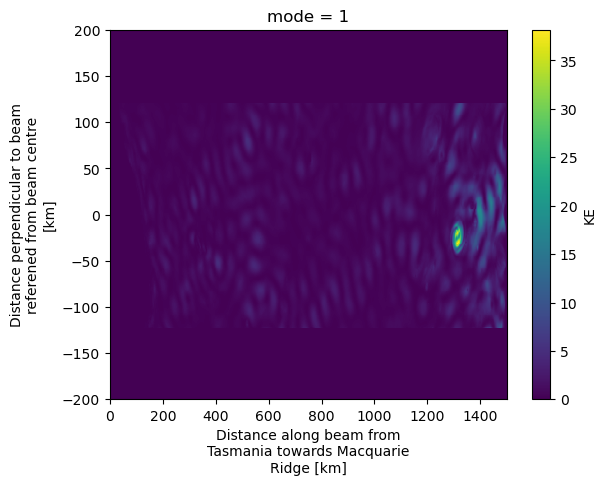

In [11]:
data["beamless-80"].KE.isel(mode = 1).plot()